# Aviation Risk Analysis: A guide to Aircraft Acquisition Decision


## Business Understanding

Despite advancements in safety regulations and aviation technology, aviation accidents continue to occur. They often have significant human, economic and regulatory consequences. The National Transportation and Safety Board (NTSB) provides detailed reports for aviation accidents. The completeness and availability of the data may vary  accross time and cases. I have been assigned the task analyze data in order to expand to new industries. The company would like to diversify its portfolio and is interested in purchasing and operating airplanes for commercial and private enterprises.

This project aims to analyze aviation accident data reported by NTSB to:
- Identify the trends and patterns over time.
- Identify aircraft with the lowest risks for investment
- Support data-driven decisions for new aviation division
- Provide visualizations that can also be understood by a non-technical audience


## Methodology

### Data Source

Our data source was provided by The National Transportation and Safety Board (NTSB) showing the aviation accidents that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In [178]:
# Importing the various libraries that will be used in the data analysis and visualization of our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [179]:
# Importing the report from NTSB 'AviationData.csv'

df = pd.read_csv(r'Data\AviationData.csv', encoding='ISO-8859-1', low_memory=False)

# Print the number of rows and columns in df for an overview of the data
print(df.shape) # There are 88889 entries and 31 columns

# Print the first five rows of df to get an insight of our data
df.head()

(88889, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [180]:
# Checking the last 5 rows of our DataFrame to see if it's structured all the way through

df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [181]:
# Creating an independent copy of the dataframe to avoid any issues with "views" later
df = df.copy()

# Stripping whitespace from column names to avoid any discrepancies
df.columns = df.columns.str.strip()

In [182]:
# Checking the columns in our Dataframe in order to understand what we are working with and know what columns to reference

print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [183]:
# Checking information of our data to see the rows, columns, datatypes and rows that might have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Based on the above info, we have rows with a lot of missing values such as Latitude, Longitude, Aircraft code, Aircraft Name, Aircraft Category, FAR Description, Schedule,Air Carrier and Publication Date. We will therefore have to clean this data in order for us to get a more accurate analysis.

## Summary Statistics

We will proceed to get the statistics of the aviation accidents that have occured over the years.

In [184]:
# Getting the summary statistics of the numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning
The following data cleaning steps were taken:
* Columns with too many missing values are dropped. 
* Only the relevant columns were chosen for a cleaner analysis
* Numerical relevant columns with missing values were replaced with 0
* Relevant columns with categorical data with missing values were replaced with 'Unknown'
* A new column that combined the total injuries was added



In [185]:
# To see the missing values per column in order to determine the columns to use in the analysis for easier handling and 
# cleaner analysis of the data
df.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Accident.Number               0
Investigation.Type            0
Event.Id                      0
Event.Date                    0
dtype: i

In [186]:
# Check percentage of missing values in the DataFrame
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Accident.Number            0

Based on the above information, some of the columns have too many missing values that could skew the data and some which are not important for the analysis, therefore we will have to select the columns to use in order to get a more accurate analysis without filtering out too much data.

In [187]:
# Convert 'Event.Date' column to datetime type
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [188]:
# Add a new 'Year' column based on the 'Event.Date' column
df['Year'] = df['Event.Date'].dt.year

# Saving the modified dataframe with the new 'Year' column to a new CSV to use in Tableau
df.to_csv('Data/AviationData_modified.csv', index=False)

In [189]:
# Check for duplicate rows
print(df.duplicated().sum())

0


## Filtering Data to relevant columns

In [190]:
# Based on the above, we have 31 columns and we need to work with the relevant columns

Relevant_columns = ['Event.Id','Aircraft.damage','Accident.Number','Country','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Event.Date','Purpose.of.flight','Make','Model','Engine.Type','Injury.Severity']
df = df[Relevant_columns]
df

,Event.Id,Aircraft.damage,Accident.Number,Country,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date,Purpose.of.flight,Make,Model,Engine.Type,Injury.Severity
0,20001218X45444,Destroyed,SEA87LA080,United States,2.0,0.0,0.0,0.0,1948-10-24,Personal,Stinson,108-3,Reciprocating,Fatal(2)
1,20001218X45447,Destroyed,LAX94LA336,United States,4.0,0.0,0.0,0.0,1962-07-19,Personal,Piper,PA24-180,Reciprocating,Fatal(4)
2,20061025X01555,Destroyed,NYC07LA005,United States,3.0,NaN,NaN,NaN,1974-08-30,Personal,Cessna,172M,Reciprocating,Fatal(3)
3,20001218X45448,Destroyed,LAX96LA321,United States,2.0,0.0,0.0,0.0,1977-06-19,Personal,Rockwell,112,Reciprocating,Fatal(2)
4,20041105X01764,Destroyed,CHI79FA064,United States,1.0,2.0,NaN,0.0,1979-08-02,Personal,Cessna,501,NaN,Fatal(1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,NaN,ERA23LA093,United States,0.0,1.0,0.0,0.0,2022-12-26,Personal,PIPER,PA-28-151,NaN,Minor
88885,20221227106494,NaN,ERA23LA095,United States,0.0,0.0,0.0,0.0,2022-12-26,NaN,BELLANCA,7ECA,NaN,NaN
88886,20221227106497,Substantial,WPR23LA075,United States,0.0,0.0,0.0,1.0,2022-12-26,Personal,AMERICAN CHAMPION AIRCRAFT,8GCBC,NaN,Non-Fatal
88887,20221227106498,NaN,WPR23LA076,United States,0.0,0.0,0.0,0.0,2022-12-26,Personal,CESSNA,210N,NaN,NaN


In order to get a better representation of the data, we will proceed to fill in the missing values for the columns; 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries'.


In [191]:
# Replace missing values in relevant columns (filling injuries with 0 where missing)
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)

In [192]:
# Replace missing categorical data with 'Unknown'
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unknown')
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown')
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')


In [193]:
# Checking if the cleaning worked
print(df.isnull().sum())

# Confirm data types
print(df.dtypes)

Event.Id                    0
Aircraft.damage             0
Accident.Number             0
Country                   226
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Event.Date                  0
Purpose.of.flight           0
Make                        0
Model                       0
Engine.Type                 0
Injury.Severity             0
dtype: int64
Event.Id                          object
Aircraft.damage                   object
Accident.Number                   object
Country                           object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Event.Date                datetime64[ns]
Purpose.of.flight                 object
Make                              object
Model                             object
Engine.Type                       object
Injury.Severity                   

Adding a new column 'Total Accident Count' to calculate a true accident rate, this counts how many accidents per model occurred.

In [194]:
#Add Accident Count column here (1 per row)
df['Total.Accident.Count'] = 1

In [195]:
print(df.columns)  # Check if 'Total.Accident.Count' exists in the DataFrame


Index(['Event.Id', 'Aircraft.damage', 'Accident.Number', 'Country',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Date',
       'Purpose.of.flight', 'Make', 'Model', 'Engine.Type', 'Injury.Severity',
       'Total.Accident.Count'],
      dtype='object')


In [196]:
# Group by Make and Model, then aggregate accident statistics
risk_summary = df.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Total.Accident.Count': 'sum'  # This gives total accident count per aircraft model
}).reset_index()

# Calculate fatality rate
risk_summary['Fatality Rate'] = risk_summary['Total.Fatal.Injuries'] / (risk_summary['Total.Fatal.Injuries'] + risk_summary['Total.Serious.Injuries'] + risk_summary['Total.Minor.Injuries'])

# Sort by Fatality Rate to identify safest aircraft
safe_aircraft = risk_summary.sort_values(by='Fatality Rate')


In [197]:
# Display the safest aircraft
print(safe_aircraft.head(10))

                       Make               Model  Total.Fatal.Injuries  \
20167                  Zito               ZMI-A                   0.0   
20161              Ziermann                 RV8                   0.0   
20160                Zielke                RV-4                   0.0   
20157                Zenith       ZODIAC CH-650                   0.0   
20153                Zenith              601HDS                   0.0   
33       ADAMS DENNIS ALLEN             VARIEZE                   0.0   
30                     ACRO  SUPER ACRO SPORT I                   0.0   
28             ABBEY VICTOR               RV9-A                   0.0   
27             ABBETT GERRY   LANCAIR EVOLUTION                   0.0   
25     AB SPORTINE AVIACIJA             LAK-17A                   0.0   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
20167                     0.0                   1.0              0.0   
20161                     0.0                   1.0 

 We could also determine the 'Accident Rate'. This can be calculate this by dividing the 'Number of Accidents' by the 'Years of Operation'. The years of operation can be calculated based on the difference between the first recorded accident and the latest ones in the 'Event Date' column.

In [198]:
# Determining the Accident Frequency for each Aircraft Model (No. of accidents for each model)
# Calculating the number of accidents for each aircraft model
accident_frequency = df['Model'].value_counts()
accident_frequency

Model
152                2367
172                1756
172N               1164
PA-28-140           932
150                 829
                   ... 
Patrol                1
CH750 Cruzer          1
ALON A2A              1
DISCOVERY             1
SUPER PETREL LS       1
Name: count, Length: 12318, dtype: int64

In [ ]:
# Calculating the first and last accident date for each model to infer years of operation
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
accident_dates = df.groupby('Model')['Event.Date'].agg(['min', 'max'])
accident_dates['Years_of_Operation'] = (accident_dates['max'] - accident_dates['min']).dt.days / 365
# Check accident dates and years of operation
print(accident_dates)

# Merge accident frequency with years of operation
# Rename the accident frequency to 'Number_of_Accidents' before merging
accident_frequency = accident_frequency.rename('Number_of_Accidents')

                          min        max  Years_of_Operation
Model                                                       
&GCBC              1987-03-03 1987-03-03                 0.0
(EX) RV-6          2018-11-07 2018-11-07                 0.0
(MODIFIED)         1983-09-24 1983-09-24                 0.0
(SOLOY CONVERSION) 1982-05-10 1982-05-10                 0.0
-269C              2002-08-26 2002-08-26                 0.0
...                       ...        ...                 ...
lebed              2021-09-16 2021-09-16                 0.0
none               2004-03-12 2004-03-12                 0.0
sportstar          2007-06-22 2007-06-22                 0.0
unk                2011-10-15 2011-10-15                 0.0
unknown            2000-03-03 2000-03-03                 0.0

[12318 rows x 3 columns]


 We could also determine the 'Accident Rate'. This can be calculate this by dividing the 'Number of Accidents' by the 'Years of Operation'. The years of operation can be calculated based on the difference between the first recorded accident and the latest ones in the 'Event Date' column.

In [200]:
# Merge the data on 'Model'
accident_data = pd.DataFrame(accident_frequency).merge(accident_dates[['Years_of_Operation']], left_index=True, right_index=True)

# Calculate the accident rate (accidents per year of operation)
accident_data['Accident_Rate'] = accident_data['Number_of_Accidents'] / accident_data['Years_of_Operation']

# Sort and display the top 10 models with the lowest accident rate
sorted_accident_data = accident_data.sort_values(by='Accident_Rate', ascending=True)
# Display the top 10 rows to see which aircraft models have the lowest accident rates
print(sorted_accident_data[['Accident_Rate']].head(10))

                  Accident_Rate
Model                          
PIK-20D                0.052435
POBER PIXIE            0.053114
T-18 TIGER             0.053141
PA-28-235C             0.054490
C46                    0.054727
YKC                    0.056301
FALCO F8L              0.056384
M-22                   0.057327
RF5B SPERBER           0.057349
CLUB LIBELLE 205       0.057872


We can also determine the risk based on frequent Aircraft models because certain models may have a low accident count and a low number injuries due to the fact that they are not in frequent use. Doing this will return the models with frequent flights grouped against the injuries and aircraft damage.

In [201]:
#Determining Risk for Frequent Aircraft Models
model_counts = df['Model'].value_counts()
top_models = model_counts.head(10).index


In [202]:
#Filter for the Top models in use
top_model_df = df[df['Model'].isin(top_models)]

#Aggregate with other risk metrics
risk_summary = top_model_df.groupby('Model').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Aircraft.damage': lambda x: x.value_counts().to_dict()
}).reset_index()


In [203]:
# Add total accidents per model that will be used later for plotting
risk_summary['Total_Accidents'] = top_model_df['Model'].value_counts().values

# Calculating the fatalities per accident
risk_summary['Fatalities_per_Accident'] = (
    risk_summary['Total.Fatal.Injuries'] / risk_summary['Total_Accidents']
)



In [204]:
# Merge the data on 'Model'
accident_data = pd.DataFrame(accident_frequency).merge(accident_dates[['Years_of_Operation']], left_index=True, right_index=True)

# Calculate the accident rate (accidents per year of operation)
accident_data['Accident_Rate'] = accident_data['Number_of_Accidents'] / accident_data['Years_of_Operation']

# Sort and display the top 10 models with the lowest accident rate
sorted_accident_data = accident_data.sort_values(by='Accident_Rate', ascending=True)
# Display the top 10 rows to see which aircraft models have the lowest accident rates
print(sorted_accident_data[['Accident_Rate']].head(10))

                  Accident_Rate
Model                          
PIK-20D                0.052435
POBER PIXIE            0.053114
T-18 TIGER             0.053141
PA-28-235C             0.054490
C46                    0.054727
YKC                    0.056301
FALCO F8L              0.056384
M-22                   0.057327
RF5B SPERBER           0.057349
CLUB LIBELLE 205       0.057872


In [205]:
# Clean and export modified aviation data for Tableau
df.to_csv('Data/AviationData_modified.csv', index=False)


## Visualization and Exploratory Data Analysis

### Figure 1: Trends Over Time

### A line graph to show the Accident Trends Over Time (Year vs. Number of Accidents)

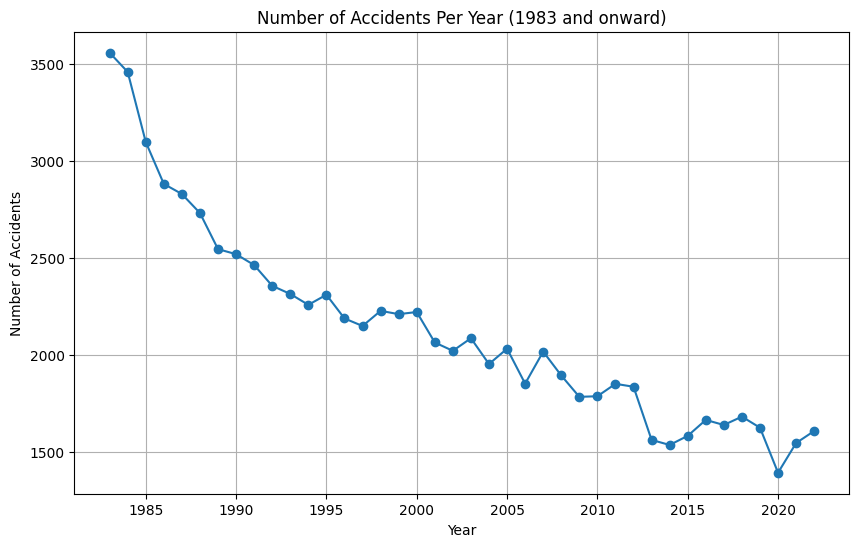

In [206]:
# Group by Year using df_filtered and count number of accidents
accidents_per_year = df_filtered.groupby('Year').size().reset_index(name='Accident Count')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year['Year'], accidents_per_year['Accident Count'], marker='o')
plt.title('Number of Accidents Per Year (1983 and onward)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

### Figure 2: Top 10 Aircraft Models by Fatal Injuries

##### This bar graph the aircraft models that reported the highest number of fatal injuries.

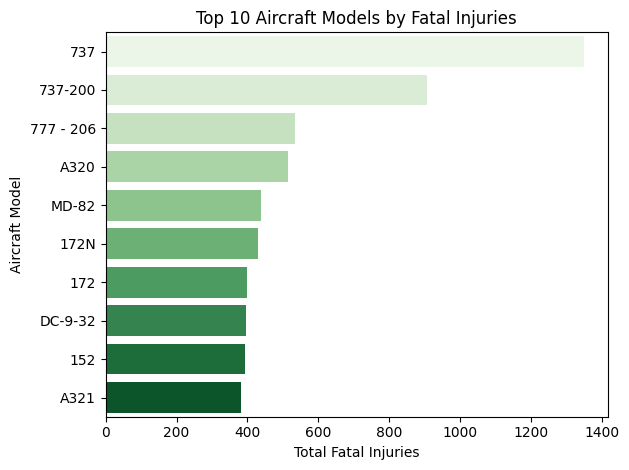

In [207]:
# Group by model and sum fatalities
model_fatalities = df.groupby('Model')['Total.Fatal.Injuries'].sum()

# Get the bottom 10 models (lowest fatalities)
top_models = model_fatalities.sort_values(ascending=False).head(10).reset_index()

# Plot with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=top_models,
    y='Model',
    x='Total.Fatal.Injuries',
    hue='Model',          # Set hue to Model
    palette='Greens',
    legend=False          # Hide the redundant legend
)
plt.title('Top 10 Aircraft Models by Fatal Injuries')  # ✅ Add chart title
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.show()


### Figure 3: Top 10 Aircraft Models by Total Serious Injuries

##### This chart shows the aircraft models that reported the highest number of serious injuries.

<Figure size 1200x600 with 0 Axes>

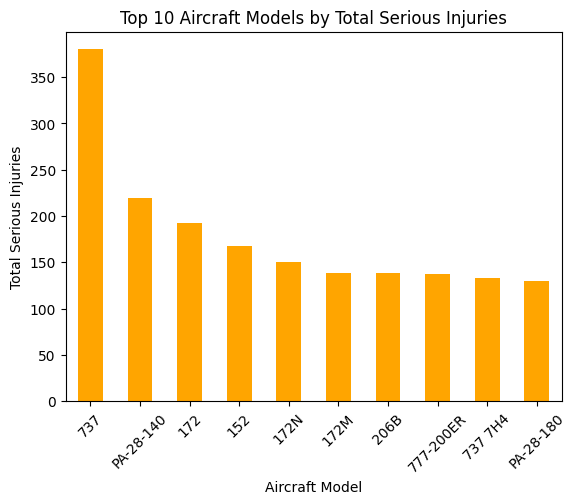

In [208]:
plt.figure(figsize=(12, 6))
safe_aircraft.sort_values(by='Total.Serious.Injuries', ascending=False).head(10).plot(kind='bar', x='Model', y='Total.Serious.Injuries', legend=False, color='orange')
plt.title('Top 10 Aircraft Models by Total Serious Injuries')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Serious Injuries')
plt.xticks(rotation=45)
plt.show()

### Figure 4: Fatalities per Aircraft Model

#### This chart shows the Top 10 Aircraft Models with the Lowest Risk

##### This was based on the fatalities reported, against how frequently the Aircraft model is used.

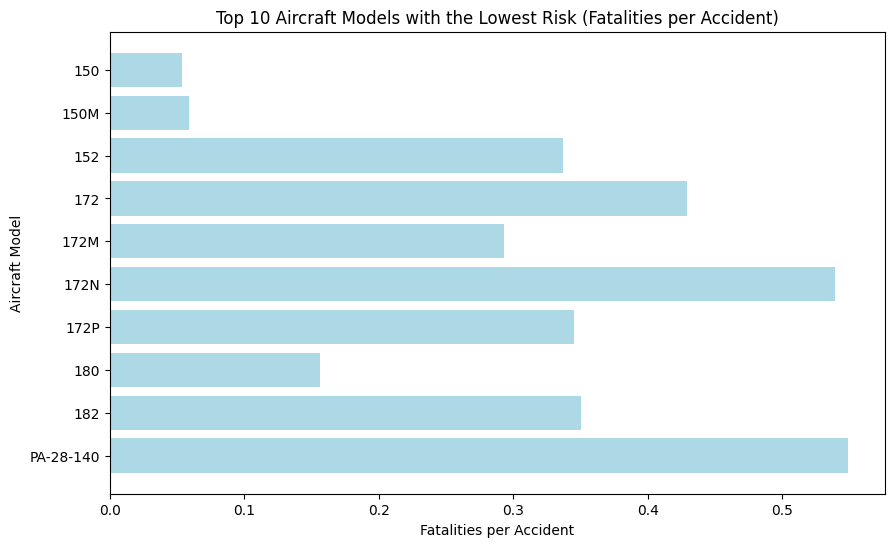

In [209]:
import matplotlib.pyplot as plt

# Plotting Fatalities per Accident for the Top 10 Models
plt.figure(figsize=(10, 6))
plt.barh(risk_summary['Model'], risk_summary['Fatalities_per_Accident'], color='lightblue')
plt.xlabel('Fatalities per Accident')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Aircraft Models with the Lowest Risk (Fatalities per Accident)')
plt.gca().invert_yaxis()  # To display the highest at the top
plt.show()


### Figure 5: Number of people injured Per Year

##### Visualization of the the Number of people injured Per Year

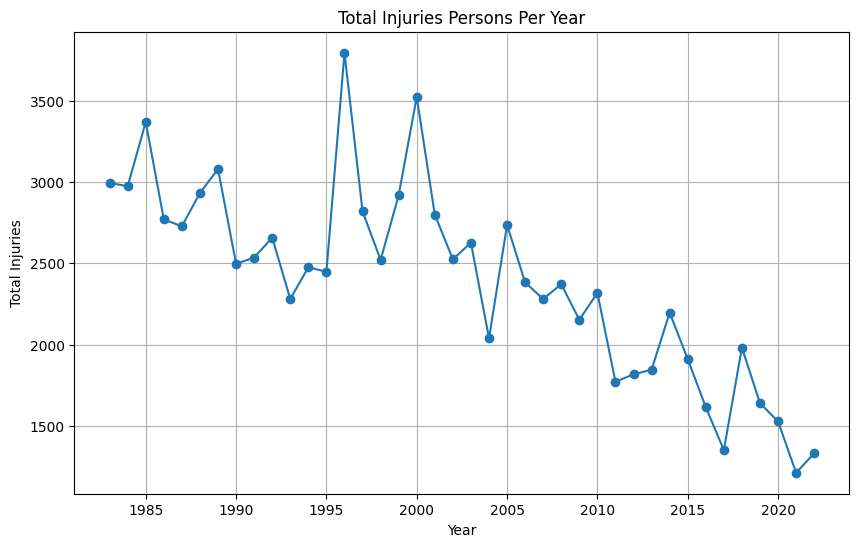

In [211]:
#To visualize how the number of people involved in accidents has changed over time:
df['Year'] = pd.to_datetime(df['Event.Date']).dt.year

# Filter data from 1983 onward since the data shows the records start in 1983
df_filtered = df[df['Year'] >= 1983].copy()
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

# Group by year and sum injuries
injuries_per_year = df_filtered.groupby('Year')['Total.Injuries'].sum().reset_index()


# Plot
plt.figure(figsize=(10, 6))
plt.plot(injuries_per_year['Year'], injuries_per_year['Total.Injuries'], marker='o')
plt.title('Total Injuries Persons Per Year')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.grid(True)
plt.show()

### Figure 6: Purpose of Flight vs. Fatalities

##### This chart visualizes the fatalities in the various types of flights showing the riskiest Flight Types (Purpose of Flight vs. Fatalities)


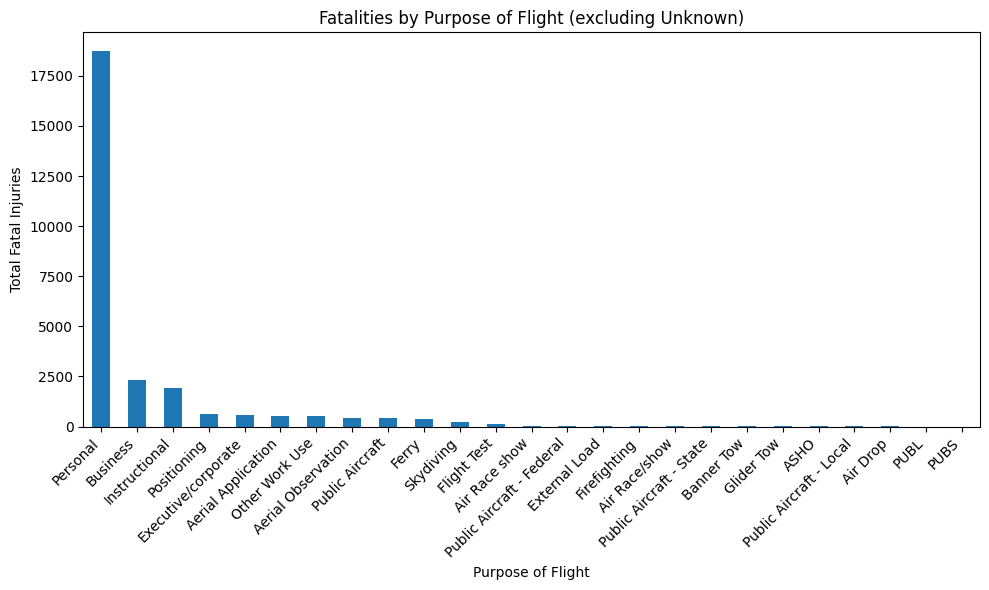

In [ ]:
#To analyze which flight purposes are associated with the highest fatalities:

# Filter out rows where 'Purpose.of.flight' is 'Unknown'
filtered_df = df[df['Purpose.of.flight'].str.lower() != 'unknown'].copy()

# Fill NaNs in fatalities with 0 and group by Purpose
filtered_df['Total.Fatal.Injuries'] = filtered_df['Total.Fatal.Injuries'].fillna(0)
flight_risk = filtered_df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
flight_risk.plot(kind='bar')
plt.title('Fatalities by Purpose of Flight (excluding Unknown)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Figure 6: Purpose of Flight vs. Fatalities

##### A different visualization of the fatalities in the various types of flights (Pie Chart)

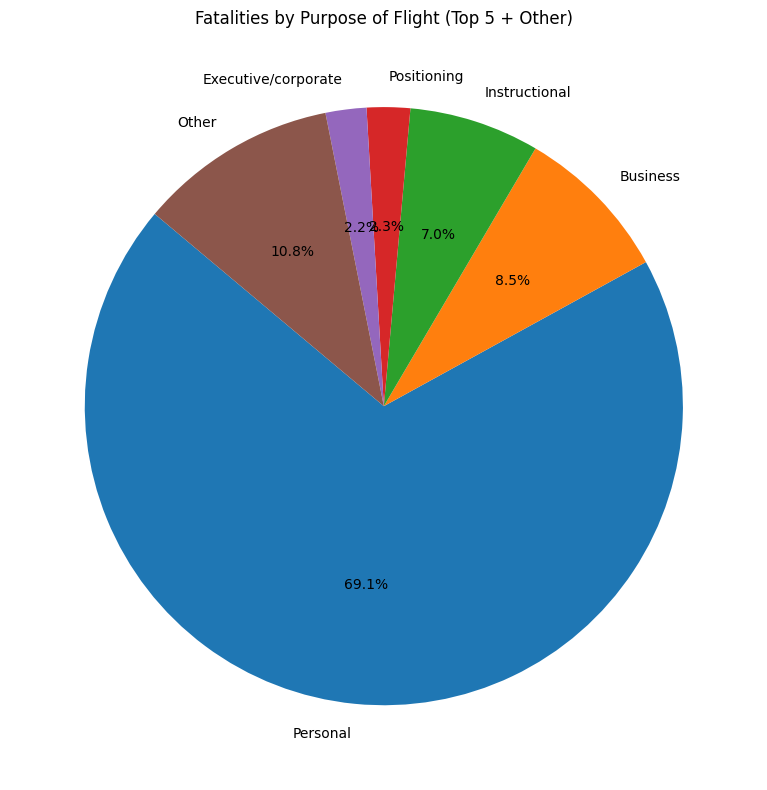

In [ ]:
# Group by Purpose and sum fatalities
flight_risk = filtered_df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum()

# Sort values in descending order
flight_risk = flight_risk.sort_values(ascending=False)

# Keep top 5, group the rest as "Other"
top_n = 5
top_flights = flight_risk[:top_n]
other_sum = flight_risk[top_n:].sum()
flight_risk_limited = pd.concat([top_flights, pd.Series({'Other': other_sum})])

# Plot pie chart
plt.figure(figsize=(8, 8))
flight_risk_limited.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Fatalities by Purpose of Flight (Top 5 + Other)')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Figure 7: Top 10 Aircraft Models with the Lowest Accident Rate

### Chart visualization of the Top 10 Aircraft Models with the Lowest Accident Rate

##### This however, might be because the Aircraft are not frequently used or might not be popular models.

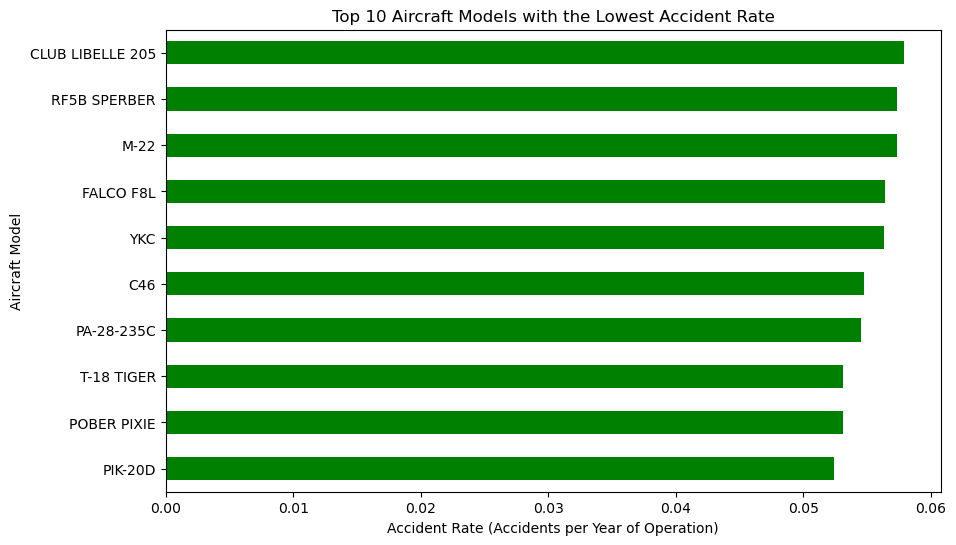

In [ ]:
# Plotting the top 10 models with the lowest accident rate
top_10_lowest_accident_rate = sorted_accident_data.head(10)

# Plotting
plt.figure(figsize=(10,6))
top_10_lowest_accident_rate['Accident_Rate'].plot(kind='barh', color='green')
plt.title('Top 10 Aircraft Models with the Lowest Accident Rate')
plt.xlabel('Accident Rate (Accidents per Year of Operation)')
plt.ylabel('Aircraft Model')
plt.show()

## Recommendations

Based on the analysis of aviation accident data, the following insights are recommended to guide aircraft investment decisions for the company’s new aviation division:

1. Consider Aircraft with a low Accident rate
Aircraft such as the Mooney M-22 and Piper PA-28 as seen in Figure 7, consistently appear in accident data with lower fatality rates per incident, suggesting they are statistically safer and reliable for general aviation or training purposes.

2. Align Investment with Use-Case Insights
Flights categorized under "Personal" or "Instructional" showed higher fatality rates compared to commercial operations as shown in Figure 6.Therefore, aircraft with safer outcomes in commercial or charter operations may be preferable if the business strategy is oriented toward such use cases. Avoid High-Risk Models Common in Personal and Instructional Flights.

3. Prioritize Aircraft Models with No or Minimal Fatalities
Aircraft with consistently low or zero fatality rates indicate higher safety and reliability.Aircraft Models such as Cessna 150, Cessna 152M and Cessna 172 showed minimum fatality rates and can be considered.

4. Consider Aircraft that have shown to have the least damage
Aircraft that frequently report "Minor" or "No Damage" in accident records demonstrate better structural integrity and cost-efficiency. This shows that the aircraft is generally a safer investment as lower damage can also signify lower injury rates.

## Conclusion

This analysis highlights that while aviation accidents have decreased over time, certain aircraft types and flight purposes continue to carry higher risks. Personal and instructional flights are disproportionately represented in fatal accident statistics, signaling the need for more caution or stricter safety controls in these categories. On the other hand, certain models of commercial flights show lower fatality rates and minimal damage records, suggesting they are safer investments for general aviation.

The findings offer a data-driven foundation for strategic aircraft acquisition, ensuring the company prioritizes safety, reliability, and cost-effectiveness in its aviation expansion.